<a href="https://colab.research.google.com/github/MihaelaHudisteanu/PMP-2024/blob/main/Partial_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from hmmlearn import hmm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Dimensiunea gridului
dimensiune_grid = (10, 10)

# Lista de culori predefinite
culori = [
    "red", "blue", "green", "yellow",
    "purple", "orange", "pink", "cyan",
    "brown", "lime"
]

# Citirea gridului
df = pd.read_csv('grid_culori.csv')
grid_culori = df.to_numpy

# Generarea secvenței de culori observate
observatii = ["red", "red", "lime", "yellow", "blue"]

# Mapare culori -> indecși
culoare_to_idx = {culoare: idx for idx, culoare in enumerate(culori)}
idx_to_culoare = {idx: culoare for culoare, idx in culoare_to_idx.items()}

# Transformăm secvența de observații în indecși
observatii_idx = [culoare_to_idx[c] for c in observatii]

# Definim stările ascunse ca fiind toate pozițiile din grid (100 de stări)
numar_stari = dimensiune_grid[0] * dimensiune_grid[1]
stari_ascunse = [(i, j) for i in range(dimensiune_grid[0]) for j in range(dimensiune_grid[1])]
stare_to_idx = {stare: idx for idx, stare in enumerate(stari_ascunse)}
idx_to_stare = {idx: stare for stare, idx in stare_to_idx.items()}

state_probability = []
for state in stari_ascunse:
  state_probability.append(1/numar_stari)



# Matrice de tranziție ---------------------------------------------------
transitions = np.zeros((numar_stari, numar_stari))
for i, j in stari_ascunse:
    vecini = [
        (i - 1, j), (i + 1, j), (i, j - 1), (i, j + 1), (i, j)  # sus, jos, stânga, dreapta sau sta pe loc
    ]
    vecini_valizi = [stare_to_idx[(x, y)] for x, y in vecini if 0 <= x < 10 and 0 <= y < 10]
    if (i, j-1) in vecini_valizi : #putem merge la stanga
      transitions[idx_to_stare[(i,j)][(i, j-1)]] = 4/10
      prob = (6/10) / (len(vecini_valizi) - 1)
      for x,y in vecini_valizi:
        if (x,y) != (i, j-1):
          transitions[(i,j)][(x,y)] = prob
    else:
      prob = 1 / len(vecini_valizi)
      for x,y in vecini_valizi:
        if (x,y) != (i, j-1):
          transitions[(i,j)][(x,y)] = prob

# Matrice de emisie
emissions = np.zeros((numar_stari, len(culori))) #the probabilities of each observed state given the corresponding hidden state.
for i in emissions:
  i = 1/(len(stari)*len(culori))



# Modelul HMM
model = hmm.CategoricalHMM(n_components=numar_stari)
model.startprob = state_probability
model.transmat = transitions
model.emissionprob = emissions


# Rulăm algoritmul Viterbi pentru secvența de observații
secventa_stari = model.predict(observatii)


# Convertim secvența de stări în poziții din grid
drum = [idx_to_stare[idx] for idx in secventa_stari]

# Vizualizăm drumul pe grid
fig, ax = plt.subplots(figsize=(8, 8))
for i in range(dimensiune_grid[0]):
    for j in range(dimensiune_grid[1]):
        culoare = grid_culori[i, j]
        ax.add_patch(plt.Rectangle((j, dimensiune_grid[0] - i - 1), 1, 1, color=culoare))
        ax.text(j + 0.5, dimensiune_grid[0] - i - 0.5, culoare,
                color="white", ha="center", va="center", fontsize=8, fontweight="bold")

# Evidențiem drumul rezultat
for idx, (i, j) in enumerate(drum):
    ax.add_patch(plt.Circle((j + 0.5, dimensiune_grid[0] - i - 0.5), 0.3, color="black", alpha=0.7))
    ax.text(j + 0.5, dimensiune_grid[0] - i - 0.5, str(idx + 1),
            color="white", ha="center", va="center", fontsize=10, fontweight="bold")

# Setări axă
ax.set_xlim(0, dimensiune_grid[1])
ax.set_ylim(0, dimensiune_grid[0])
ax.set_xticks(range(dimensiune_grid[1]))
ax.set_yticks(range(dimensiune_grid[0]))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid(visible=True, color="black", linewidth=0.5)
ax.set_aspect("equal")
plt.title("Drumul rezultat al stărilor ascunse", fontsize=14)
plt.show()

In [ ]:
from hmmlearn import hmm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Dimensiunea gridului
dimensiune_grid = (10, 10)

# Lista de culori predefinite
culori = [
    "red", "blue", "green", "yellow",
    "purple", "orange", "pink", "cyan",
    "brown", "lime"
]

# Citirea gridului
df = pd.read_csv('grid_culori.csv')
grid_culori = df.to_numpy

# Generarea secvenței de culori observate
observatii = ["red", "red", "lime", "yellow", "blue"]

# Mapare culori -> indecși
culoare_to_idx = {culoare: idx for idx, culoare in enumerate(culori)}
idx_to_culoare = {idx: culoare for culoare, idx in culoare_to_idx.items()}

# Transformăm secvența de observații în indecși
observatii_idx = [culoare_to_idx[c] for c in observatii]

# Definim stările ascunse ca fiind toate pozițiile din grid (100 de stări)
numar_stari = dimensiune_grid[0] * dimensiune_grid[1]
stari_ascunse = [(i, j) for i in range(dimensiune_grid[0]) for j in range(dimensiune_grid[1])]
stare_to_idx = {stare: idx for idx, stare in enumerate(stari_ascunse)}
idx_to_stare = {idx: stare for stare, idx in stare_to_idx.items()}

state_probability = []
for state in stari_ascunse:
  state_probability.append(1/numar_stari)



# Matrice de tranziție ---------------------------------------------------
transitions = np.zeros((numar_stari, numar_stari))
for i, j in stari_ascunse:
    vecini = [
        (i - 1, j), (i + 1, j), (i, j + 1), (i, j)  # sus, jos, dreapta sau sta pe loc
    ]
    vecini_valizi = [stare_to_idx[(x, y)] for x, y in vecini if 0 <= x < 10 and 0 <= y < 10]
    prob = 1 / len(vecini_valizi)
    for x,y in vecini_valizi:
      transitions[(i,j)][(x,y)] = prob

# Matrice de emisie
emissions = np.zeros((numar_stari, len(culori))) #the probabilities of each observed state given the corresponding hidden state.
for i in emissions:
  i = 1/(numar_stari*len(culori))



# Modelul HMM
model = hmm.CategoricalHMM(n_components=numar_stari)
model.startprob = state_probability
model.transmat = transitions
model.emissionprob = emissions


# Rulăm algoritmul Viterbi pentru secvența de observații
secventa_stari = model.predict(observatii)

# Convertim secvența de stări în poziții din grid
drum = [idx_to_stare[idx] for idx in secventa_stari]

# Vizualizăm drumul pe grid
fig, ax = plt.subplots(figsize=(8, 8))
for i in range(dimensiune_grid[0]):
    for j in range(dimensiune_grid[1]):
        culoare = grid_culori[i, j]
        ax.add_patch(plt.Rectangle((j, dimensiune_grid[0] - i - 1), 1, 1, color=culoare))
        ax.text(j + 0.5, dimensiune_grid[0] - i - 0.5, culoare,
                color="white", ha="center", va="center", fontsize=8, fontweight="bold")

# Evidențiem drumul rezultat
for idx, (i, j) in enumerate(drum):
    ax.add_patch(plt.Circle((j + 0.5, dimensiune_grid[0] - i - 0.5), 0.3, color="black", alpha=0.7))
    ax.text(j + 0.5, dimensiune_grid[0] - i - 0.5, str(idx + 1),
            color="white", ha="center", va="center", fontsize=10, fontweight="bold")

# Setări axă
ax.set_xlim(0, dimensiune_grid[1])
ax.set_ylim(0, dimensiune_grid[0])
ax.set_xticks(range(dimensiune_grid[1]))
ax.set_yticks(range(dimensiune_grid[0]))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid(visible=True, color="black", linewidth=0.5)
ax.set_aspect("equal")
plt.title("Drumul rezultat al stărilor ascunse", fontsize=14)
plt.show()

Subiectul 3.


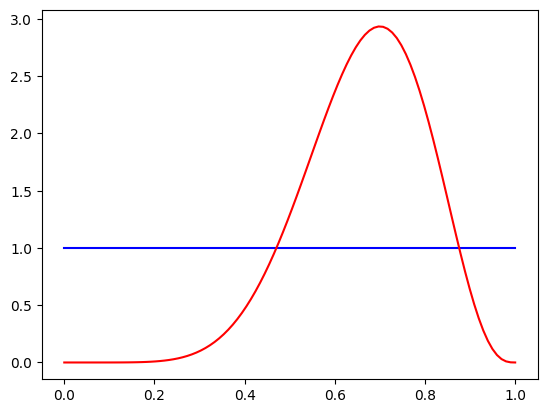

In [7]:
import arviz as az
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

observed = [0,0,1,1,0,0,0,0,1,0]
total_s = 7
observation_nr = 10
observed_rate = total_s / observation_nr

alpha_prior = 1
beta_prior = 1

alpha_posteriori = 1 + total_s
beta_posteriori = 1 + observation_nr - total_s

x = np.linspace(0, 1, 100)
prior_pdf = beta.pdf(x, alpha_prior, beta_prior)
posterior_pdf = beta.pdf(x, alpha_posteriori, beta_posteriori)

plt.plot(x, prior_pdf, label=f'Prior (α={alpha_prior}, β={beta_prior})', color='blue')
plt.plot(x, posterior_pdf, label=f'Posterior (α={alpha_posteriori}, β={beta_posteriori})', color='red')

plt.show()



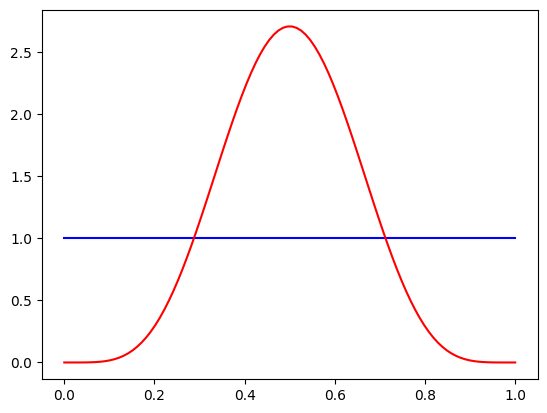

In [8]:
import arviz as az
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

observed = [1,1,0,1,0,0,1,0,0,1]
total_s = 5
observation_nr = 10
observed_rate = total_s / observation_nr

alpha_prior = 1
beta_prior = 1

alpha_posteriori = 1 + total_s
beta_posteriori = 1 + observation_nr - total_s

x = np.linspace(0, 1, 100)
prior_pdf = beta.pdf(x, alpha_prior, beta_prior)
posterior_pdf = beta.pdf(x, alpha_posteriori, beta_posteriori)

plt.plot(x, prior_pdf, label=f'Prior (α={alpha_prior}, β={beta_prior})', color='blue')
plt.plot(x, posterior_pdf, label=f'Posterior (α={alpha_posteriori}, β={beta_posteriori})', color='red')

plt.show()



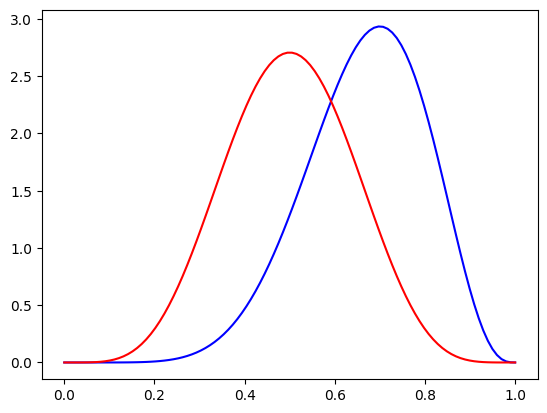

In [9]:
import arviz as az
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

observed = [1,1,0,1,0,0,1,0,0,1]
total_s = 5
observation_nr = 10
observed_rate = total_s / observation_nr

alpha_prior = 8
beta_prior = 4

alpha_posteriori = 1 + total_s
beta_posteriori = 1 + observation_nr - total_s

x = np.linspace(0, 1, 100)
prior_pdf = beta.pdf(x, alpha_prior, beta_prior)
posterior_pdf = beta.pdf(x, alpha_posteriori, beta_posteriori)

plt.plot(x, prior_pdf, label=f'Prior (α={alpha_prior}, β={beta_prior})', color='blue')
plt.plot(x, posterior_pdf, label=f'Posterior (α={alpha_posteriori}, β={beta_posteriori})', color='red')

plt.show()

